In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

<Figure size 640x480 with 0 Axes>

In [2]:
def load_data():
    data=pd.read_csv(r"Data\pd_speech_features.csv",)
    data.columns = data.iloc[0]
    data= data.iloc[1: , :]
    data=data.drop('id',axis=1)
    data=data.sample(frac=1)
    labels=data['class']
    data=data.drop('class',axis=1)
    
    return data,labels

data,labels=load_data()

In [3]:
data

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
520,1,0.79865,0.57376,0.47711,347,346,0.005571637,5.82E-05,0.00096,5.36E-06,...,2.9887,4.1005,3.3895,2.5501,2.6555,2.7239,2.2796,2.576,2.5895,3.4479
254,0,0.8568,0.80533,0.46087,435,434,0.004438307,5.28E-05,0.00106,4.72E-06,...,8.024,3.0937,3.2624,3.5665,5.7636,26.5364,30.308,25.0281,24.7547,68.6664
634,0,0.84386,0.75649,0.43172,363,362,0.005312216,3.90E-05,0.00078,4.14E-06,...,2.1989,2.2336,2.3275,2.8376,3.1743,2.8949,3.1839,4.1253,4.5805,3.7793
129,1,0.81634,0.64393,0.57462,273,272,0.007080068,0.000136295,0.00179,1.27E-05,...,1.5963,3.6303,102.503,35.4456,32.6962,23.8895,20.8759,27.5055,20.7775,14.5989
90,0,0.8276,0.63579,0.24278,404,403,0.004779499,3.06E-05,0.00064,3.08E-06,...,215.4478,175.2876,123.4963,27.7693,5.2906,4.1913,4.3029,3.9654,3.2715,2.9646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0,0.82745,0.69727,0.37036,432,431,0.004468509,4.01E-05,0.00115,5.12E-06,...,1.9954,2.3879,2.7256,7.8633,9.151,10.7618,15.8496,16.579,22.694,89.0699
77,0,0.83576,0.79762,0.40497,358,357,0.005402546,4.74E-05,0.00143,7.73E-06,...,3.1359,79.3196,59.4084,40.291,15.7448,7.2957,9.693,11.4446,13.7622,6.557
502,1,0.80456,0.70612,0.33944,257,256,0.007493308,4.28E-05,0.00101,7.58E-06,...,1.5353,1.6125,43.5383,75.2876,76.0753,72.7387,61.8121,55.5402,47.0509,91.8193
667,0,0.85971,0.67213,0.36905,393,392,0.004912711,6.14E-05,0.00094,4.64E-06,...,1.7255,1.6737,1.6235,71.3903,36.7387,10.3534,9.1317,18.7334,20.8992,14.5305


In [4]:
data.describe()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,2,740,745,748,315,319,755,646,358,543,...,750,749,755,752,753,749,752,753,753,754
top,1,0.82273,0.80616,0.34552,237,236,0.006004477,5.83E-05,0.00076,1.39E-05,...,1.6695,11.5115,4.0251,3.0619,3.3603,3.2838,3.1144,12.595,4.2391,3.2941
freq,390,3,2,2,9,8,2,3,9,10,...,2,2,2,2,2,2,2,2,2,2


In [5]:
data.isnull().sum()

0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
                            ..
tqwt_kurtosisValue_dec_32    0
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
Length: 753, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_scaled = pd.DataFrame(scalar.fit_transform(data), columns=data.columns)
data_scaled

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.968742,0.309524,-1.817862,-0.086986,0.232244,0.234771,-0.431929,-0.446582,-0.519532,-0.496977,...,-0.412868,-0.524658,-0.596562,-0.628426,-0.559909,-0.534274,-0.618200,-0.777950,-0.843215,-0.819485
1,-1.032266,0.653238,1.505859,-0.205222,1.119757,1.120647,-1.052858,-0.454008,-0.481455,-0.524941,...,-0.297612,-0.548519,-0.600460,-0.588599,-0.404758,0.805624,1.098085,0.651019,0.693534,1.087024
2,-1.032266,0.576752,0.804859,-0.417451,0.393610,0.395840,-0.574061,-0.472986,-0.588070,-0.550284,...,-0.430946,-0.568904,-0.629134,-0.617161,-0.534011,-0.524652,-0.562826,-0.679345,-0.705176,-0.809797
3,0.968742,0.414086,-0.810713,0.622945,-0.514074,-0.510169,0.394509,-0.339186,-0.203493,-0.176260,...,-0.444739,-0.535802,2.443274,0.660554,0.939670,0.656686,0.520522,0.808693,0.417788,-0.493511
4,-1.032266,0.480642,-0.927546,-1.793046,0.807111,0.808577,-0.865926,-0.484538,-0.641378,-0.596600,...,4.450235,3.532605,3.087144,0.359765,-0.428369,-0.451705,-0.494306,-0.689521,-0.795931,-0.833613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-1.032266,0.479755,-0.045125,-0.864188,1.089501,1.090447,-1.036311,-0.471473,-0.447185,-0.507464,...,-0.435604,-0.565247,-0.616924,-0.420233,-0.235665,-0.081992,0.212742,0.113274,0.550662,1.683472
752,-1.032266,0.528874,1.395197,-0.612207,0.343183,0.345506,-0.524571,-0.461434,-0.340570,-0.393421,...,-0.409498,1.258091,1.121552,0.850416,0.093486,-0.277025,-0.164250,-0.213506,-0.068594,-0.728597
753,0.968742,0.344457,0.081899,-1.089304,-0.675440,-0.671238,0.620915,-0.467760,-0.500493,-0.399975,...,-0.446135,-0.583625,0.634812,2.221726,3.105077,3.405366,3.027200,2.592968,2.239366,1.763844
754,-1.032266,0.670438,-0.405959,-0.873726,0.696171,0.697843,-0.792941,-0.442181,-0.527147,-0.528437,...,-0.441782,-0.582175,-0.650726,2.069014,1.141464,-0.104972,-0.198620,0.250391,0.426226,-0.495511


In [7]:
# Method 1 for dimension reduction
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(random_state=2,max_depth=10)
model1.fit(data,labels)
print("Dimension Reduction done")

Dimension Reduction done


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
411,0,0.78991,0.83561,0.3334,372,371,0.005186792,4.90E-05,0.00113,5.86E-06,...,112.2577,61.1446,20.2593,6.4921,6.5002,9.5002,9.8331,8.0799,6.9204,2.6948
426,1,0.49231,0.75583,0.8498,112,107,0.009241015,0.000589142,0.02775,0.00025648,...,11.8991,1.9327,2.1889,29.3002,28.1956,27.2019,43.3029,53.5871,40.2744,93.142
31,1,0.79196,0.66429,0.69379,212,211,0.009104241,0.000111466,0.00354,3.22E-05,...,2.2994,2.151,2.119,4.3379,5.9496,4.1898,3.1736,2.9994,2.9446,3.8043
538,1,0.24164,0.78342,0.63352,239,238,0.00809496,0.000158005,0.00214,1.73E-05,...,1.5769,1.6122,14.7791,20.4438,5.5828,4.4942,6.0828,14.0307,10.646,10.9042
468,1,0.86364,0.83083,0.55985,250,249,0.007711596,9.04E-05,0.00369,2.85E-05,...,1.5707,1.744,95.1695,25.3594,4.0593,3.2636,3.913,3.4838,3.0588,3.2383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,1,0.80665,0.61493,0.6002,242,241,0.007971983,6.86E-05,0.00162,1.29E-05,...,1.8661,1.8574,3.7109,2.9855,2.6307,2.6897,3.8939,6.5859,8.7967,14.1727
515,0,0.79225,0.72175,0.45346,346,345,0.00557753,5.28E-05,0.00098,5.44E-06,...,6.2307,5.3425,6.3238,7.2737,4.2224,3.1236,2.7313,18.7789,22.4631,83.3482
622,1,0.80765,0.7747,0.48003,272,271,0.007086226,7.20E-05,0.00151,1.07E-05,...,1.5455,2.5053,2.8389,3.3534,3.4437,4.561,5.0762,3.484,3.4902,4.2894
687,1,0.83405,0.76165,0.44345,285,284,0.006772009,5.71E-05,0.00123,8.34E-06,...,1.7055,15.2594,36.4588,13.5266,4.8854,3.7817,5.6088,34.6387,34.4628,81.7748


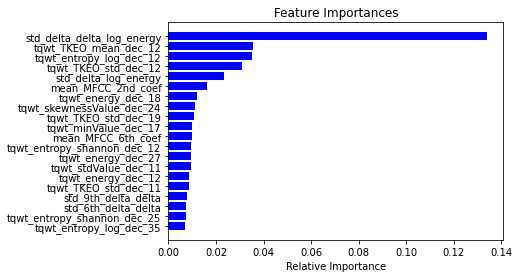

In [8]:
features=data.columns
importances=model1.feature_importances_
indices = np.argsort(importances)[-20:]  # top 80 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
selected_features=[features[i] for i in indices]

In [9]:
data_after_RF=data[selected_features]

In [10]:
data_after_RF

,tqwt_entropy_log_dec_35,tqwt_entropy_shannon_dec_25,std_6th_delta_delta,std_9th_delta_delta,tqwt_TKEO_std_dec_11,tqwt_energy_dec_12,tqwt_stdValue_dec_11,tqwt_energy_dec_27,tqwt_entropy_shannon_dec_12,mean_MFCC_6th_coef,tqwt_minValue_dec_17,tqwt_TKEO_std_dec_19,tqwt_skewnessValue_dec_24,tqwt_energy_dec_18,mean_MFCC_2nd_coef,std_delta_log_energy,tqwt_TKEO_std_dec_12,tqwt_entropy_log_dec_12,tqwt_TKEO_mean_dec_12,std_delta_delta_log_energy
520,-2309.7719,189.3635,0.018408,0.01284,0.0028273,0.0073524,0.037692,4.51E-05,157.782,-1.6877,-0.75638,0.011171,0.00047731,0.046431,-1.9717,0.020313,0.0025669,-116365.5415,0.0015677,0.0078168
254,-3374.4678,44.7992,0.018965,0.02175,2.85E-06,0.00039806,0.0010009,0.00022453,0.77374,-2.0767,-0.090316,0.00051377,1.13E-18,0.016202,2.8502,0.037457,6.64E-06,-217577.2067,4.02E-06,0.010547
634,-1750.1357,193.1674,0.032461,0.020545,4.17E-05,7.90E-05,0.0037313,0.10056,3.5128,-1.8295,-0.19727,0.095021,-0.0011053,0.019801,1.645,0.061864,7.65E-05,-196875.1207,2.71E-05,0.021631
129,-2651.5268,162.9883,0.020011,0.016623,0.00035225,0.001609,0.011017,0.016544,55.0837,-1.0935,-0.80117,0.30835,-0.0018418,0.3041,0.80108,0.012465,0.00076701,-139538.7389,0.0003785,0.0064803
90,-1613.738,262.7038,0.013905,0.012121,0.00051621,0.0048381,0.013267,1.58E-05,128.0801,-2.0709,-0.92812,0.048442,4.23E-05,0.056862,-0.31404,0.018277,0.0012412,-122319.9537,0.00092046,0.0060161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,-2980.4698,192.9394,0.016594,0.01561,0.00024555,0.0022885,0.00974,0.00030573,100.5226,-1.4169,-1.1025,0.13944,3.44E-17,0.28734,1.8894,0.024106,0.0012235,-127009.4995,0.00081241,0.009572
77,-2404.0607,126.0535,0.01917,0.020261,0.0005164,0.00025798,0.010779,0.001416,12.9105,-0.22431,-0.95856,0.1363,-0.00069716,0.21148,3.0053,0.041855,0.00069316,-173078.0224,0.00011446,0.012932
502,-3074.2418,183.054,0.019303,0.016719,5.71E-05,0.00027945,0.004917,0.099148,6.6614,-1.129,-0.51028,0.16404,5.86E-18,0.16844,3.3438,0.030341,0.00012097,-183231.5901,6.10E-05,0.011296
667,-3330.9258,59.7806,0.013483,0.012447,7.01E-06,0.0001437,0.0014492,0.15384,1.3815,-1.8186,-0.19089,0.044707,-1.92E-18,0.12229,1.66,0.04791,9.98E-06,-207277.2123,5.25E-06,0.016466


In [11]:
labels

520    0
254    1
634    1
129    0
90     0
      ..
618    1
77     1
502    1
667    0
357    1
Name: class, Length: 756, dtype: object

<h1 > Halt and Stop </h1>
<h2> PCA Code </h2>

In [ ]:
from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
principalComponents = pca_1.fit_transform(data)
data_after_RF=pd.DataFrame(principalComponents)
data_after_RF

<h2> PCA STOP </h2>

In [14]:
# Defining Splitter for the dataset (Common for all)
def splitter(len_array,lower_bound, incrementor, start_idx):
    final=0
    per=[]
    sp=[start_idx]
    for i in range(lower_bound,100,incrementor):
        if final+i>100:
            break
        per.append(i)
        final+=i
    for i in per:
        len_of_data=round((i/100)*len_array)
        sp.append(sp[-1]+len_of_data)
    return per,sp

lower_bound=5
incrementor=5
start_idx=0

        
spliting_percentage, spliting_position=splitter(len(data),lower_bound,incrementor,start_idx)
print("Splitting Percentages are: {}".format(spliting_percentage))
print("Splitting Position are: {}".format(spliting_position))

Splitting Percentages are: [5, 10, 15, 20, 25]
Splitting Position are: [0, 38, 114, 227, 378, 567]


In [15]:
data_for_experiment=data_after_RF.copy(deep=True)
labels_for_experiment=labels.copy(deep=True)

# Apply ML Algorithms

# ************************************** Logistic Regression **************************************************

In [12]:
# SImple Algorithm
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2']
    c_values = [100]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    y_pred = grid_search.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
#     print("Training set score for logreg_model: %f" % grid_search.score(X_train , y_train))
#     print("Testing  set score for logreg_model: %f" % grid_search.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best: 0.000000 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
[[  7  35]
 [  2 108]]


              precision    recall  f1-score   support

           0       0.78      0.17      0.27        42
           1       0.76      0.98      0.85       110

    accuracy                           0.76       152
   macro avg       0.77      0.57      0.56       152
weighted avg       0.76      0.76      0.69       152

******************End of iteration******************



In [16]:
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))

    model = LogisticRegression(max_iter=1000)
    solvers = ["lbfgs","liblinear"]
    penalty = ['l2','l1']
    c_values = [10]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=2, cv=cv, scoring='f1',error_score=0,)
    grid_result = grid_search.fit(X_train, Y_train)
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    #Predict the response for test dataset
    Y_pred = grid_search.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
Best: 0.000000 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
[[ 7  3]
 [ 6 22]]


              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.88      0.79      0.83        28

    accuracy                           0.76        38
   macro avg       0.71      0.74      0.72        38
weighted avg       0.79      0.76      0.77        38

******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)
Shape of training output Y_train: (76,)
Shape of testing output Y_test: (76, 1)
Best: 0.000000 using {'C': 10, 'penalty': 'l

# ****KNN Classifer ****

In [17]:
# splitting dataset into training and testing part
test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.730068870523416 

Best #neighbors: 3 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[20 24]
 [15 93]]


              precision    recall  f1-score   support

           0       0.57      0.45      0.51        44
           1       0.79      0.86      0.83       108

    accuracy                           0.74       152
   macro avg       0.68      0.66      0.67       152
weighted avg       0.73      0.74      0.73       152

Training set score for knn_model: 0.842715
Testing  set score for knn_model: 0.743421
******************End of iteration******************



In [18]:
# splitting dataset into training and testing part
for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    model = KNeighborsClassifier()
    params_grid = [{'n_neighbors': [2,3,4], 'weights' :['uniform'],'leaf_size':[4,5,6,7,8,9],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]
    knn_model = GridSearchCV(model, params_grid, cv=5)
    knn_model.fit(X_train,Y_train)
    print('Best score for training data:', knn_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best #neighbors:',knn_model.best_estimator_.n_neighbors,"\n") 
    print('Best weights:',knn_model.best_estimator_.weights,"\n")
    print('Best leaf_size:',knn_model.best_estimator_.leaf_size,"\n")
    print('Best algorithm:',knn_model.best_estimator_.algorithm,"\n")
    final_model = knn_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for knn_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for knn_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
Best score for training data: 0.7607142857142858 

Best #neighbors: 2 

Best weights: uniform 

Best leaf_size: 4 

Best algorithm: auto 

[[ 9  7]
 [ 4 18]]


              precision    recall  f1-score   support

           0       0.57      0.45      0.51        44
           1       0.79      0.86      0.83       108

    accuracy                           0.74       152
   macro avg       0.68      0.66      0.67       152
weighted avg       0.73      0.74      0.73       152

Training set score for knn_model: 0.894737
Testing  set score for knn_model: 0.710526
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape 

# ** Support Vector Machine **

In [ ]:
# splitting dataset into training and testing part


test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [2]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

In [ ]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = SVC()
    params_grid = [{'kernel': ['linear'], 'C': [100,150]}]
    svm_model = GridSearchCV(model, params_grid, cv=3)
    svm_model.fit(X_train,y_train)
    print('Best score for training data:', svm_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best C:',svm_model.best_estimator_.C,"\n") 
    print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
    print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")
    final_model = svm_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for svm_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for svm_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

# ** Decision Tree **

In [19]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8096234996633992 

Best depth: 8 

Best #features: None 

[[29 13]
 [11 99]]


              precision    recall  f1-score   support

           0       0.72      0.69      0.71        42
           1       0.88      0.90      0.89       110

    accuracy                           0.84       152
   macro avg       0.80      0.80      0.80       152
weighted avg       0.84      0.84      0.84       152

Training set score for dc_model: 0.985099
Testing  set score for dc_model: 0.842105
******************End of iteration******************



In [21]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier()
    params_grid = [{'max_depth': [8,9,10,11,12],'random_state':[42]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,Y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    Y_pred = final_model.predict(X_test)
    print(confusion_matrix(Y_test,Y_pred))
    print("\n")
    print(classification_report(Y_test,Y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , Y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , Y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
Best score for training data: 0.7606837606837606 

Best depth: 8 

Best #features: None 

[[ 6  5]
 [ 6 21]]


              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.81      0.78      0.79        27

    accuracy                           0.71        38
   macro avg       0.65      0.66      0.66        38
weighted avg       0.72      0.71      0.71        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.710526
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)
Shape of training

<h1> **************************************************************************************************************</h1>

<h1> AdaBoost </h1>


In [23]:
# splitting dataset into training and testing part

test_data_ratio=[0.3,0.25,0.2,0.15,0.1,0.05]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.3
Best score for training data: 0.81668378702277 

Best estimator: 4 

Best #learning rate: 0.01 

Best algorithm: SAMME 

[[ 32  31]
 [ 20 144]]


              precision    recall  f1-score   support

           0       0.62      0.51      0.56        63
           1       0.82      0.88      0.85       164

    accuracy                           0.78       227
   macro avg       0.72      0.69      0.70       227
weighted avg       0.77      0.78      0.77       227

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.775330
******************End of iteration******************

******************Start of iteration******************

For ratio  0.25
Best score for training data: 0.8059964726631393 

Best estimator: 4 

Best #learning rate: 0.1 

Best algorithm: SAMME.R 

[[ 33  19]
 [ 14 123]]


              precision    recall  f1-score   support

           0       0.70      0.63      0.6

In [26]:
# splitting dataset into training and testing part


for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = DecisionTreeClassifier(max_features=None)
    params_grid = [{'n_estimators':[2,4],'learning_rate':[1.0,1e-1,1e-2],'algorithm':['SAMME.R','SAMME']}]
    model_ada=AdaBoostClassifier(model,)
    dc_model = GridSearchCV(model_ada, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best estimator:',dc_model.best_estimator_.n_estimators,"\n") 
    print('Best #learning rate:',dc_model.best_estimator_.learning_rate,"\n")
    print('Best algorithm:',dc_model.best_estimator_.algorithm,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (189,)
Shape of testing output Y_test: (189, 1)
Best score for training data: 0.844017094017094 

Best estimator: 2 

Best #learning rate: 1.0 

Best algorithm: SAMME.R 

[[ 4  3]
 [10 21]]


              precision    recall  f1-score   support

           0       0.29      0.57      0.38         7
           1       0.88      0.68      0.76        31

    accuracy                           0.66        38
   macro avg       0.58      0.62      0.57        38
weighted avg       0.77      0.66      0.69        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.657895
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input

# ** Ensemble Learning **

In [19]:

test_data_ratio=[0.20]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(y_test,Y_pred))
    print(classification_report(y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , y_test ))
    

    score = accuracy_score(y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
[[  2  36]
 [  0 114]]
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.76      1.00      0.86       114

    accuracy                           0.76       152
   macro avg       0.88      0.53      0.48       152
weighted avg       0.82      0.76      0.67       152

Training set score for EL: 0.791391
Testing  set score for EL: 0.763158
Hard Voting Score  0
******************End of iteration******************



In [25]:

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    Y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    Y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    estimator = []
    # make different combination in the ensemble classfier
    estimator.append(('lr',LogisticRegression(solver='saga',penalty='l1',C=1,n_jobs=2)))
    estimator.append(('SVC', SVC(gamma ='scale',probability=True,C=100,kernel='linear',)))
    base_estimator=DecisionTreeClassifier(max_depth=14,criterion='gini', splitter='best', min_samples_split=17,random_state=42)
    model = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=250 ,learning_rate=1,algorithm='SAMME',random_state=7)
    estimator.append(('DTC', model))
    #estimator.append(('svc_rbf',SVC(gamma ='auto',C=4,kernel='rbf',)))


    vot_hard = VotingClassifier(estimators = estimator, voting ='soft')
    vot_hard.fit(X_train,Y_train)
    Y_pred = vot_hard.predict(X_test)
    
    print(confusion_matrix(Y_test,Y_pred))
    print(classification_report(Y_test,Y_pred))
    print("Training set score for EL: %f" % vot_hard.score(X_train , Y_train))
    print("Testing  set score for EL: %f" % vot_hard.score(X_test  , Y_test ))
    

    score = accuracy_score(Y_test, Y_pred)
    print("Hard Voting Score % d" % score)
    

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (38,)
Shape of testing output Y_test: (38, 1)
[[ 0 12]
 [ 0 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      1.00      0.81        26

    accuracy                           0.68        38
   macro avg       0.34      0.50      0.41        38
weighted avg       0.47      0.68      0.56        38

Training set score for EL: 0.789474
Testing  set score for EL: 0.684211
Hard Voting Score  0
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)
Shape of training output Y_train: (76,)
Shape of testing output Y_test: (76, 1)


C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luhar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 7 10]
 [ 0 59]]
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        17
           1       0.86      1.00      0.92        59

    accuracy                           0.87        76
   macro avg       0.93      0.71      0.75        76
weighted avg       0.89      0.87      0.85        76

Training set score for EL: 0.921053
Testing  set score for EL: 0.868421
Hard Voting Score  0
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 15
Shape of training input X_train: (113, 20)
Shape of testing input X_test: (113, 20)
Shape of training output Y_train: (113,)
Shape of testing output Y_test: (113, 1)
[[ 1 38]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        39
           1       0.66      1.00      0.80        74

    accuracy                           0.66       113
   macro avg       0.8

# ** Random Forest **

In [29]:
# splitting dataset into training and testing part

test_data_ratio=[0.2]
for i in test_data_ratio:
    print("******************Start of iteration******************\n")
    print("For ratio ",i)
    X_train, X_test, y_train, y_test=train_test_split(data_after_RF,labels,test_size=i,shuffle=True)
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[10,15,20]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************

For ratio  0.2
Best score for training data: 0.8559266374398634 

Best depth: 6 

Best #estimators: 100 

Best jobs: 10 

[[ 15  23]
 [  5 109]]


              precision    recall  f1-score   support

           0       0.75      0.39      0.52        38
           1       0.83      0.96      0.89       114

    accuracy                           0.82       152
   macro avg       0.79      0.68      0.70       152
weighted avg       0.81      0.82      0.79       152

Training set score for dc_model: 0.950331
Testing  set score for dc_model: 0.815789
******************End of iteration******************



In [31]:
# splitting dataset into training and testing part

for i in range(len(spliting_position)-1):
    print("******************Start of iteration******************")
    print("Splitting percentage is {}".format(spliting_percentage[i]))
    
    X_train=pd.DataFrame(data_for_experiment.iloc[spliting_position[i]:spliting_position[i+1],:])
    y_train=labels_for_experiment.iloc[spliting_position[i]:spliting_position[i+1]]
    X_test=data_for_experiment.drop(X_train.index, axis=0).sample(len(X_train))
    y_test=np.array(pd.DataFrame(labels_for_experiment,index=X_test.index))
    
    print("Shape of training input X_train: {}".format(X_train.shape))
    print("Shape of testing input X_test: {}".format(X_test.shape))
    print("Shape of training output Y_train: {}".format(Y_train.shape))
    print("Shape of testing output Y_test: {}".format(Y_test.shape))
    
    model = RandomForestClassifier()
    params_grid = [{'max_depth': [5,6,7],'random_state':[42],'n_jobs':[2]}]
    dc_model = GridSearchCV(model, params_grid, cv=3)
    dc_model.fit(X_train,y_train)
    print('Best score for training data:', dc_model.best_score_,"\n") 

    # View the best parameters for the model found using grid search
    print('Best depth:',dc_model.best_estimator_.max_depth,"\n") 
    print('Best #estimators:',dc_model.best_estimator_.n_estimators,"\n")
    print('Best jobs:',dc_model.best_estimator_.n_jobs,"\n") 
    #print('Best #features:',dc_model.best_estimator_.max_features,"\n")
    #print('Best Gamma:',dc_model.best_estimator_.,"\n")
    final_model = dc_model.best_estimator_

    
    #Predict the response for test dataset
    y_pred = final_model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("\n")
    print(classification_report(y_test,y_pred))
    print("Training set score for dc_model: %f" % final_model.score(X_train , y_train))
    print("Testing  set score for dc_model: %f" % final_model.score(X_test  , y_test ))

    print("******************End of iteration******************\n")

******************Start of iteration******************
Splitting percentage is 5
Shape of training input X_train: (38, 20)
Shape of testing input X_test: (38, 20)
Shape of training output Y_train: (189,)
Shape of testing output Y_test: (189, 1)
Best score for training data: 0.8183760683760685 

Best depth: 5 

Best #estimators: 100 

Best jobs: 2 

[[ 7  4]
 [ 1 26]]


              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.87      0.96      0.91        27

    accuracy                           0.87        38
   macro avg       0.87      0.80      0.82        38
weighted avg       0.87      0.87      0.86        38

Training set score for dc_model: 1.000000
Testing  set score for dc_model: 0.868421
******************End of iteration******************

******************Start of iteration******************
Splitting percentage is 10
Shape of training input X_train: (76, 20)
Shape of testing input X_test: (76, 20)

# ...........THANK YOU.........HAPPY CODING.......